# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:**
 - Deleting redundant columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    - Get Correlation between different variables
    - Plot all Neighbourhood Group
    - Neighbourhood
    - Room Type
    - Relation between neighbourgroup and Availability of Room
    - Map of Neighbourhood group
    - Map of Neighbourhood
    - Availabity of rooom
5. **Word Cloud**
6. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

Reading data from csv file

In [3]:
airbnb=pd.read_csv('data.csv')

#### Print the Shape of the dataset

In [4]:
airbnb.shape

(48895, 16)

#### Print the Datatypes of the dataset

In [5]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Removing the Duplicates if any

In [7]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

#### Check for the null values in each column

In [8]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Drop unnecessary columns

In [9]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### Examining Changes

In [10]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Rreplace the 'reviews per month' by zero

In [11]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the NaN values from the dataset

In [12]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

### Examine Continous Variables

In [13]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Print all the columns names

In [14]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Get Correlation between different variables

The code calculates the Kendall correlation matrix (corr) for the 'airbnb' dataset using the corr method, and then creates a heatmap visualization using seaborn (sns.heatmap) with correlation values annotated. The plt.figure(figsize=(15,8)) statement sets the size of the figure. Lastly, the column names of the 'airbnb' dataset are displayed.






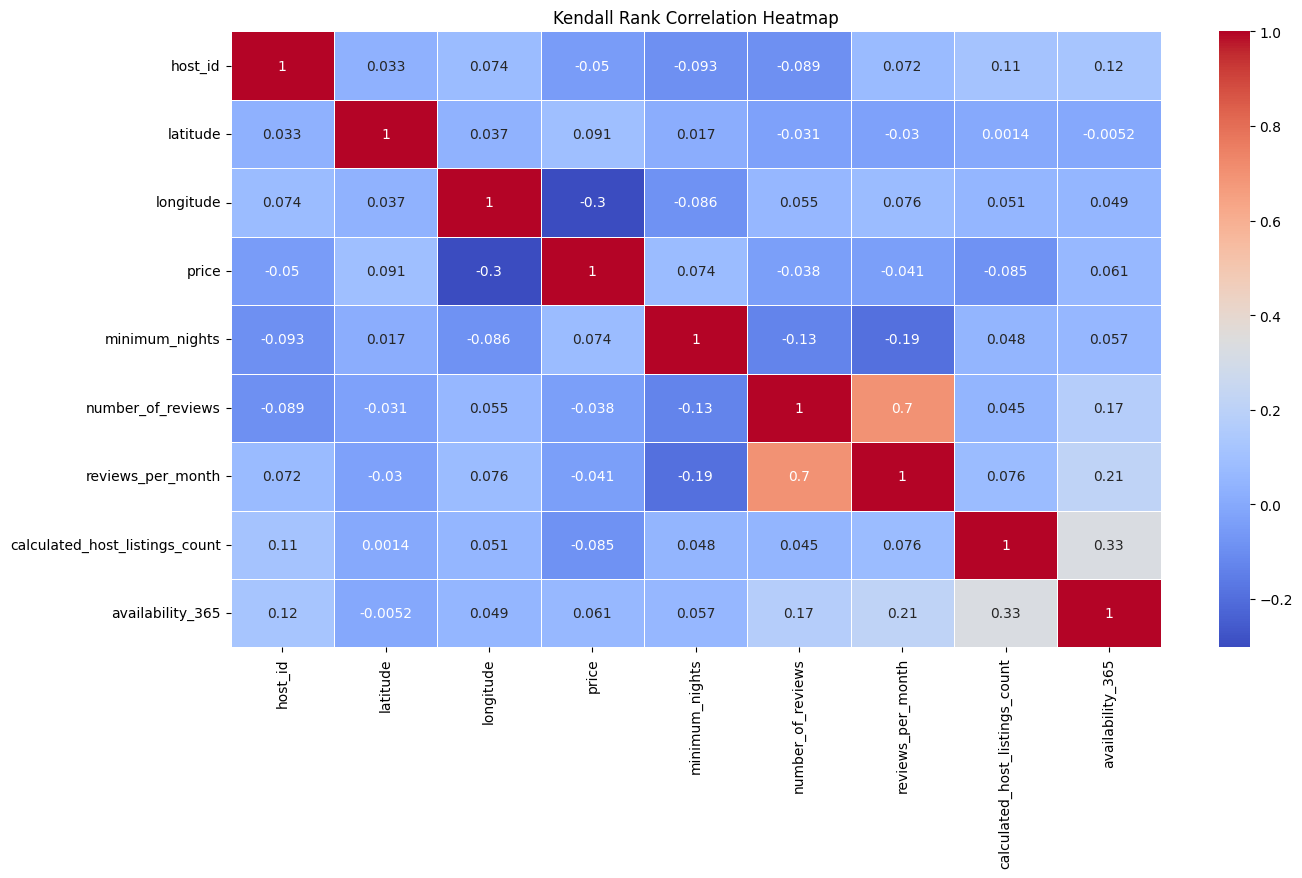

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'airbnb' is your DataFrame

# Select only numeric columns
numeric_columns = airbnb.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_columns.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Kendall Rank Correlation Heatmap')
plt.show()


In [20]:
airbnb.shape

(48895, 12)

In [21]:
airbnb.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


## Data Visualization

In [22]:
import seaborn as sns

The code retrieves the unique values present in the 'neighbourhood_group' column of the 'airbnb' dataset, displaying them.






In [23]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Plot all Neighbourhood Group

The code creates a count plot using seaborn (sns.countplot) to visualize the frequency of each unique value in the 'neighbourhood_group' column of the 'airbnb' dataset. The figure size is set to 10x10, and a title is added to the plot.






Text(0.5, 1.0, 'Neighbourhood Group')

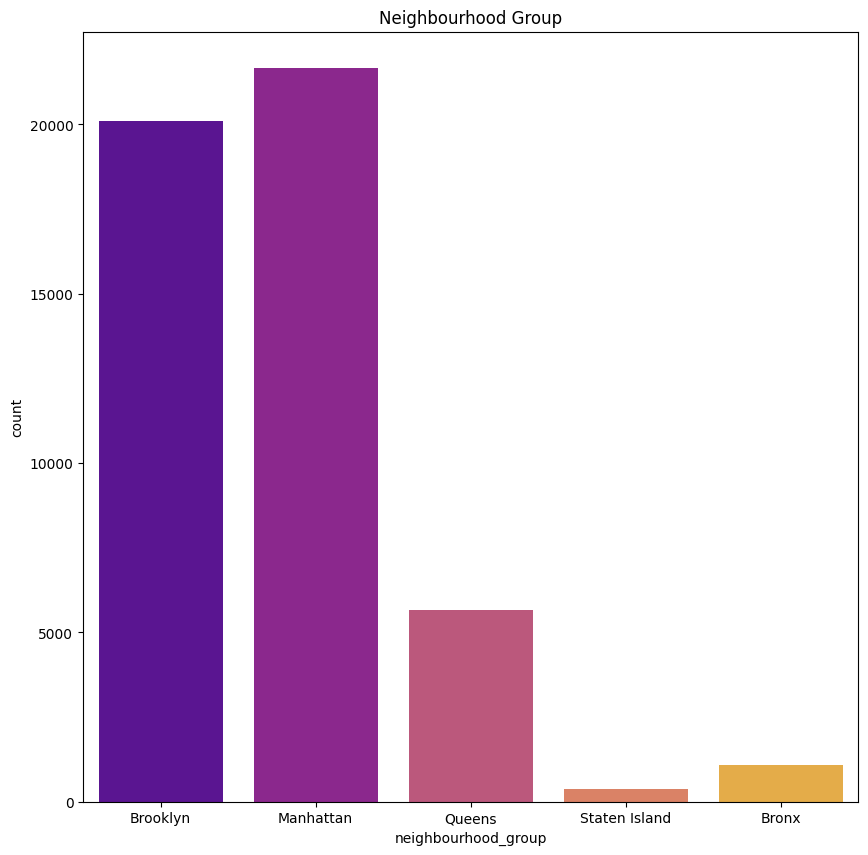

In [24]:
sns.countplot(x = airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### Neighbourhood

The code creates a count plot using seaborn (sns.countplot) to visualize the frequency of each unique value in the 'neighbourhood' column of the 'airbnb' dataset. The figure size is set to 25x6, and a title is added to the plot.






Text(0.5, 1.0, 'Neighbourhood')

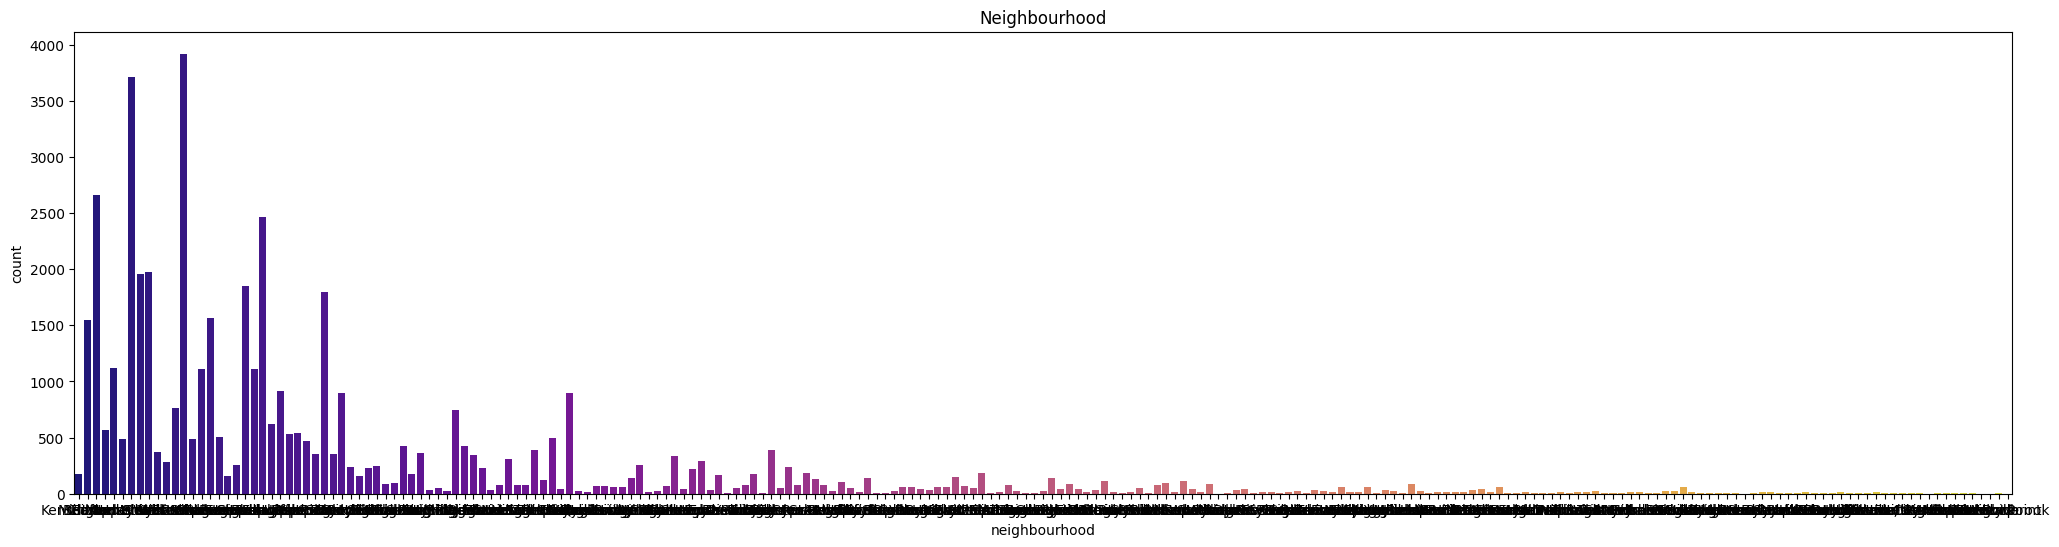

In [25]:
sns.countplot(x = airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

The code creates a count plot using seaborn (sns.countplot) to visualize the frequency of each unique value in the 'room_type' column of the 'airbnb' dataset. The figure size is set to 10x10, and a title is added to the plot, indicating whether the listings represent restaurants delivering online or not.






Text(0.5, 1.0, 'Restaurants delivering online or Not')

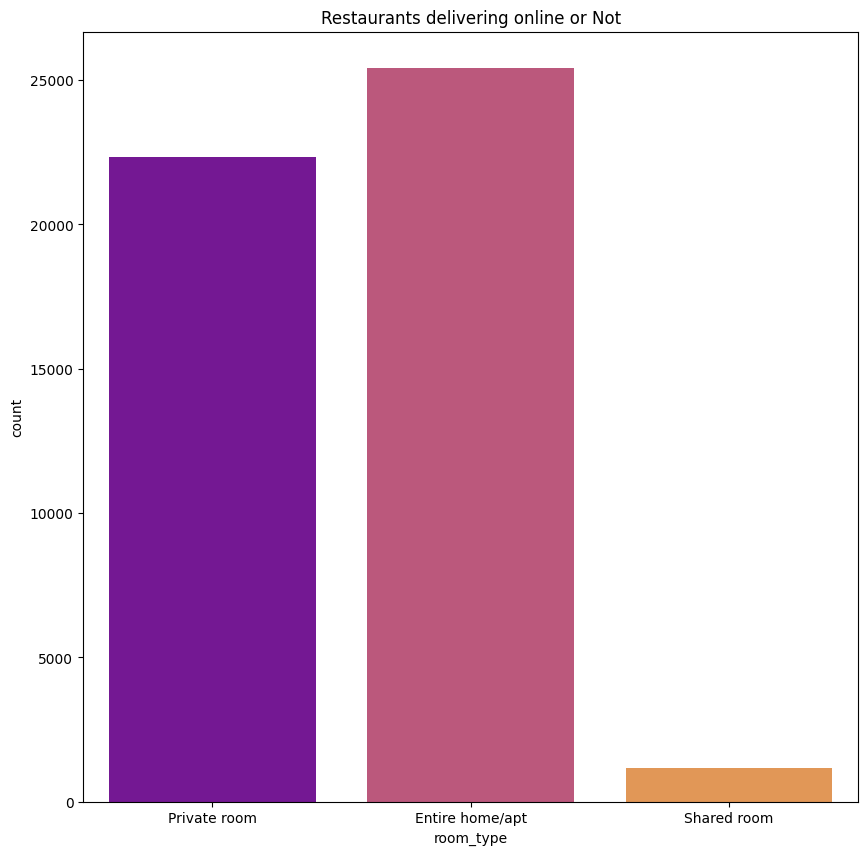

In [26]:
#Restaurants delivering Online or not
sns.countplot(x = airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

### Relation between neighbourgroup and Availability of Room

The code creates a boxplot using seaborn (sns.boxplot) to visualize the distribution of the 'availability_365' variable across different 'neighbourhood_group' values in the 'airbnb' dataset. The figure size is set to 10x10, and a color palette is specified.






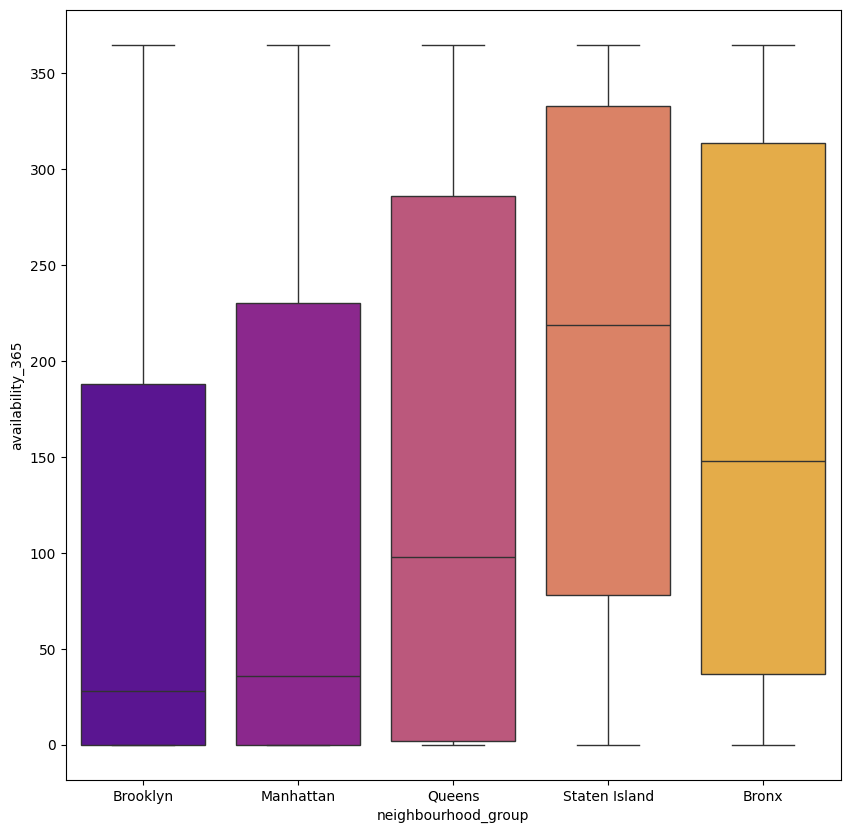

In [27]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

## Map of Neighbourhood group

The code creates a scatter plot using seaborn (sns.scatterplot) to display the geographical locations of Airbnb listings based on longitude and latitude. The points are colored according to the 'neighbourhood_group' variable. The figure size is set to 10x6, and plt.ioff() disables interactive mode. The plot is then displayed using plt.show().






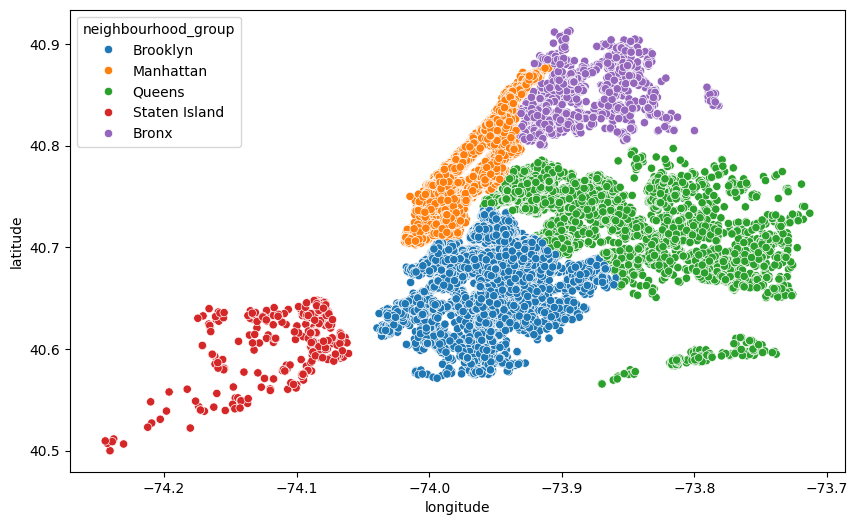

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude,y = airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.ioff()
plt.show()

## Map of Neighbourhood

The code creates a scatter plot using seaborn (sns.scatterplot) to display the geographical locations of Airbnb listings based on longitude and latitude. The points are colored according to the 'neighbourhood' variable. The figure size is set to 10x6, and plt.ioff() disables interactive mode. The plot is then displayed using plt.show().






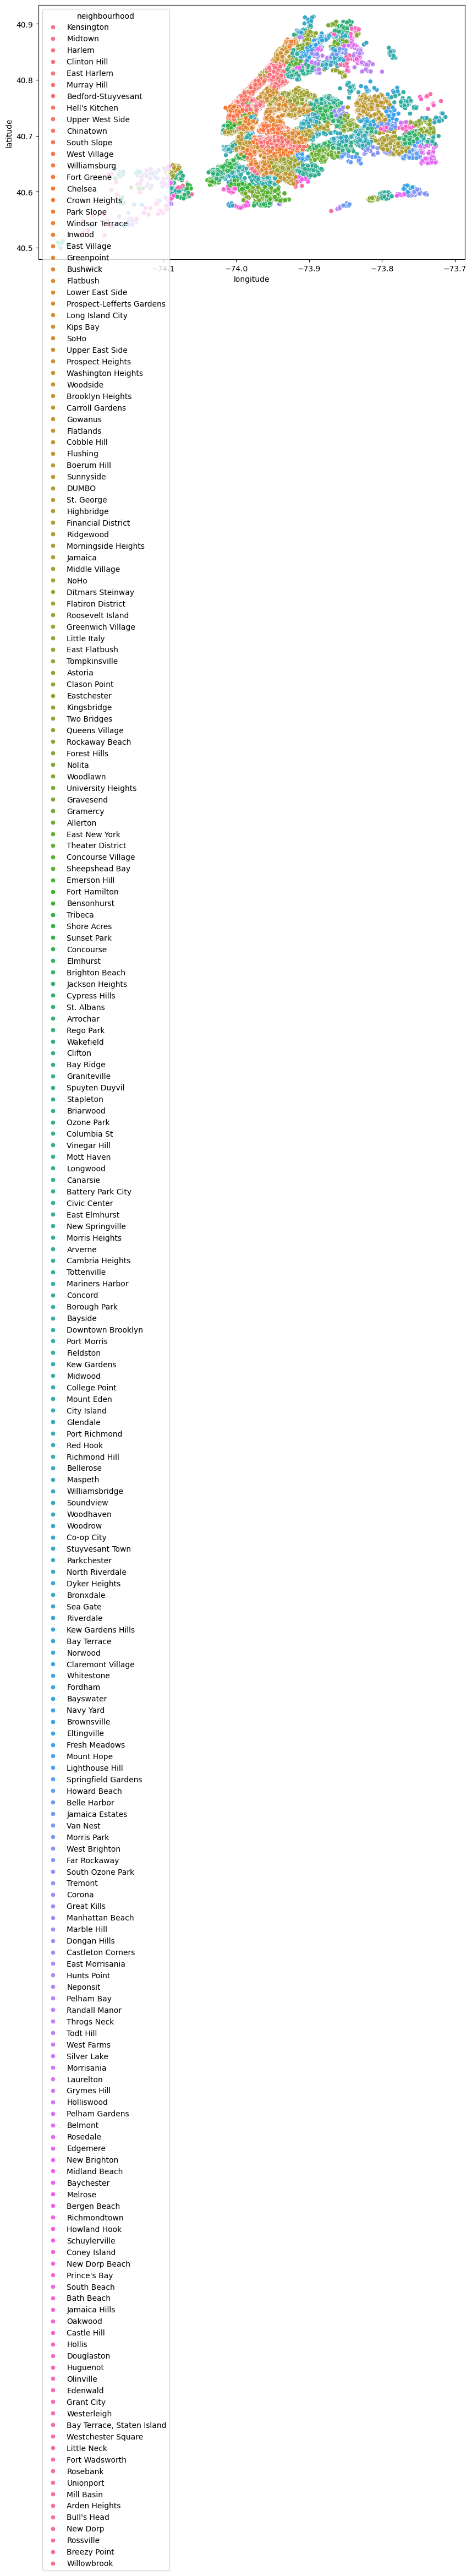

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=airbnb.neighbourhood)
plt.ioff()
plt.show()

The code creates a scatter plot using seaborn (sns.scatterplot) to display the geographical locations of Airbnb listings based on longitude and latitude. The points are colored according to the 'room_type' variable. The figure size is set to 10x6, plt.ioff() disables interactive mode, and plt.show() displays the plot.






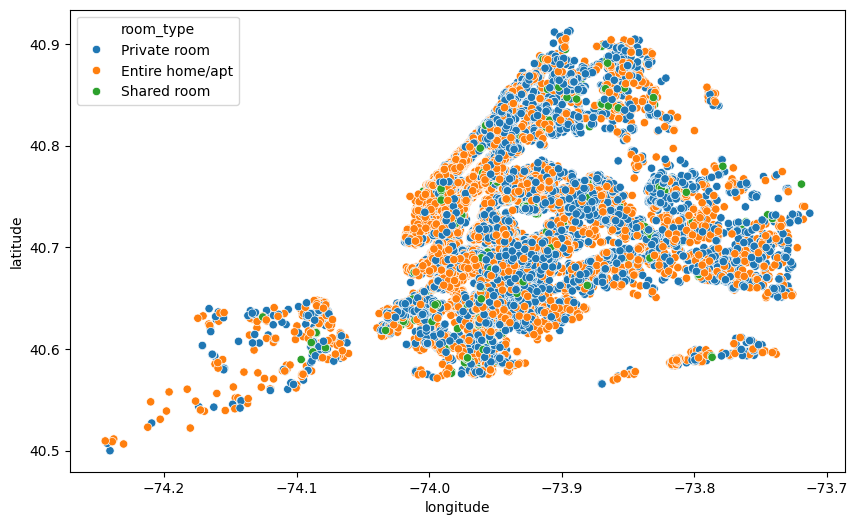

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude,y = airbnb.latitude, hue=airbnb.room_type)
plt.ioff()
plt.show()

## Availability of Room

The code creates a scatter plot using seaborn (sns.scatterplot) to display the geographical locations of Airbnb listings based on longitude and latitude. The points are colored according to the 'availability_365' variable. The figure size is set to 10x6, plt.ioff() disables interactive mode, and plt.show() displays the plot.






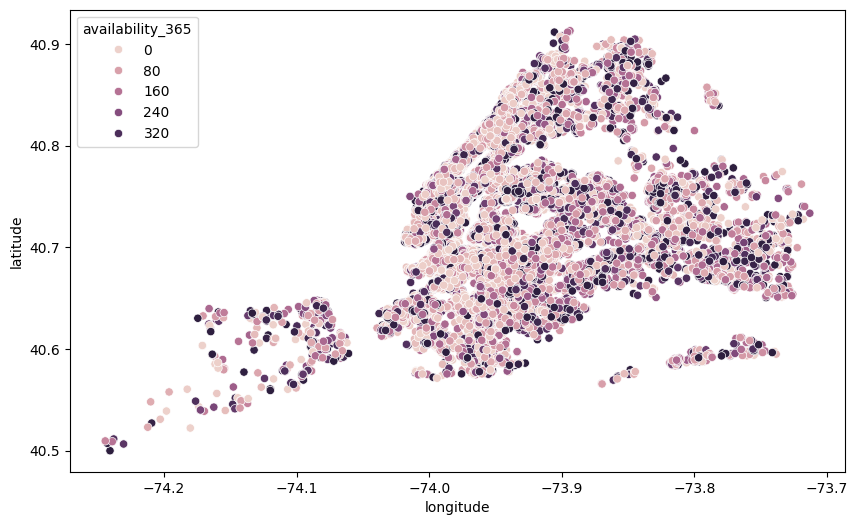

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude,y = airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()
plt.show()

## WordCloud

In [33]:
from wordcloud import WordCloud

The code creates a word cloud visualization using WordCloud from the 'neighbourhood' values in the 'airbnb' dataset. The figure size is set to 25x15, and the resulting word cloud is displayed and saved as 'neighbourhood.png'.






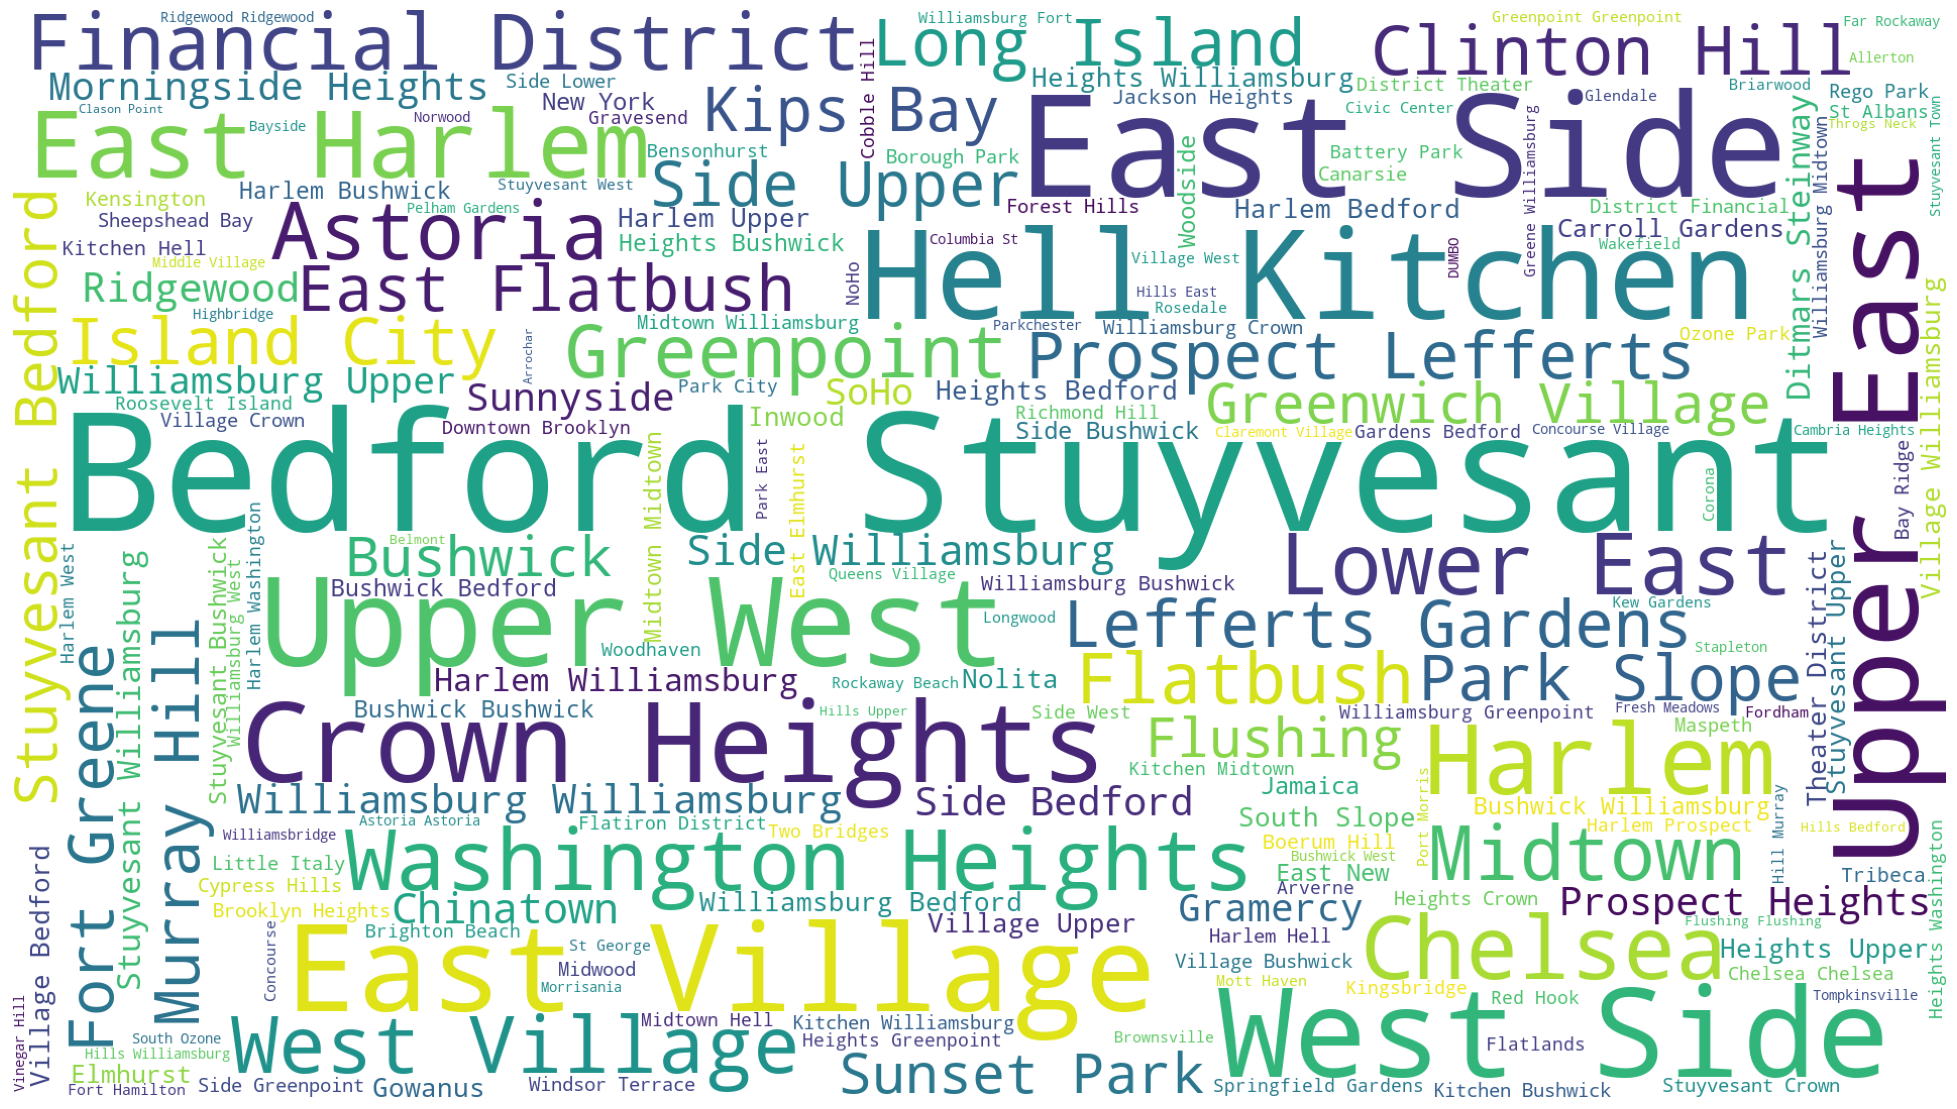

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## Regression Analysis

### Drop Columns

The code drops several columns ('host_id', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'reviews_per_month') from the 'airbnb' dataset using the drop function with axis=1 (columns) and inplace=True (modifying the dataset in-place). The resulting dataset is then displayed with the head(5) function to examine the changes.






In [35]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


The code defines a function Encode that encodes categorical variables in the 'airbnb' dataset ('neighbourhood_group' and 'room_type') using factorization. The function modifies a copy of the dataset and returns the encoded version stored in 'airbnb_en'.






In [36]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [37]:
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


The code calculates the Kendall's correlation coefficient between variables in the 'airbnb_en' dataset and creates a heatmap using seaborn (sns.heatmap) to visualize the correlation values. The figure size is set to 18x12, and the column names of the dataset are displayed. The resulting heatmap is shown using plt.show().






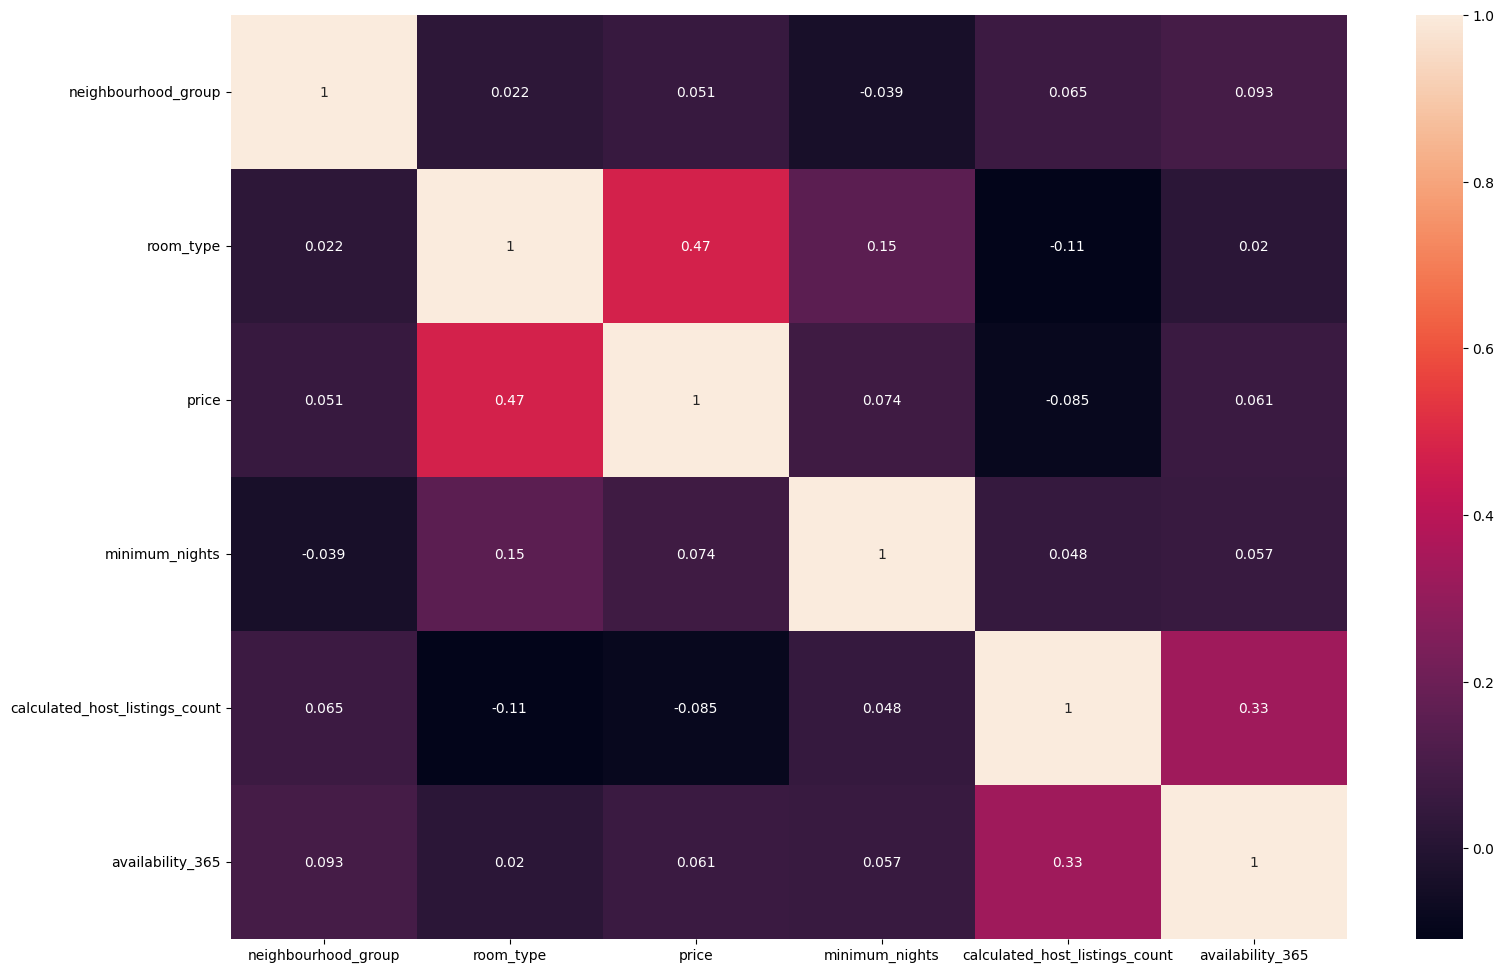

In [38]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

The code defines the independent variables (x) as a subset of columns from the 'airbnb_en' dataset, and the dependent variable (y) as the 'price' column. It then splits the data into training and testing sets using train_test_split, with a test size of 10% and a random state of 353. The code displays the head of the training sets (x_train and y_train).






In [40]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [41]:
x_train.shape

(44005, 5)

The code creates a Linear Regression model (reg) and fits it to the training data (x_train and y_train). It then uses the model to make predictions (y_pred) on the test data (x_test), and calculates the R-squared score (r2_score) to evaluate the model's performance.






In [42]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07480306392848901

The code prepares a Decision Tree Regression model (DTree) by splitting the data into training and test sets. It then fits the model to the training data (x_train and y_train), makes predictions on the test data (x_test) using the trained model, and calculates the R-squared score (r2_score) to evaluate the model's performance.






In [43]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.25340847089993634

The code prepares a Decision Tree Regression model (DTree) by splitting the data into training and test sets. It then fits the model to the training data (x_train and y_train), makes predictions on the test data (x_test) using the trained model, and calculates the R-squared score (r2_score) to evaluate the model's performance.






In [44]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.25341486191980844